# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

SK_ID_CURR_Grouped
(99645.747, 171252.6]    5.158362
(171252.6, 242503.2]     5.158362
(242503.2, 313753.8]     5.171726
(313753.8, 385004.4]     5.171726
(385004.4, 456255.0]     5.171726
Name: FYI, dtype: float64


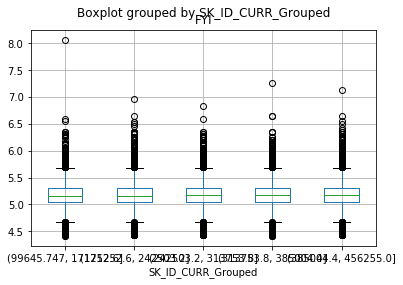

TARGET_Grouped
0    5.171726
1    5.130334
Name: FYI, dtype: float64


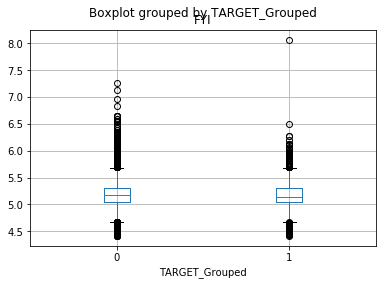

NAME_CONTRACT_TYPE_Grouped
0    5.184691
1    5.130334
Name: FYI, dtype: float64


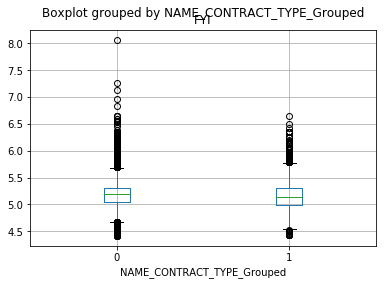

CODE_GENDER_Grouped
F      5.130334
M      5.255273
XNA    5.256625
Name: FYI, dtype: float64


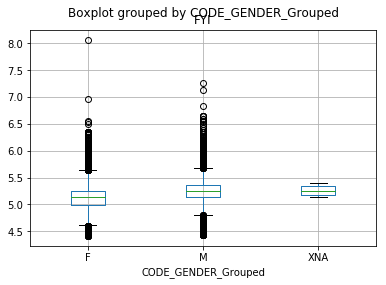

FLAG_OWN_CAR_Grouped
0    5.130334
1    5.255273
Name: FYI, dtype: float64


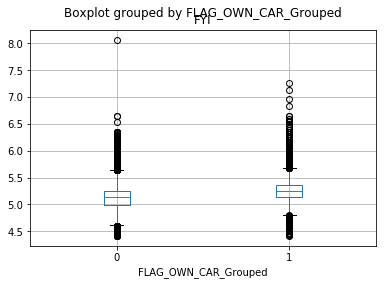

FLAG_OWN_REALTY_Grouped
0    5.158362
1    5.171726
Name: FYI, dtype: float64


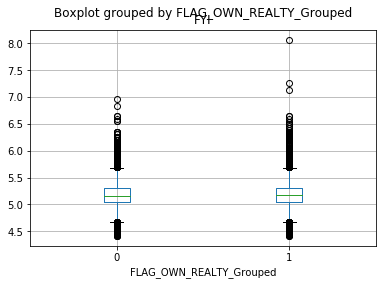

CNT_CHILDREN_Grouped
(-0.019, 3.8]    5.169086
(3.8, 7.6]       5.144574
(7.6, 11.4]      5.051153
(11.4, 15.2]     5.352183
(15.2, 19.0]     5.051153
Name: FYI, dtype: float64


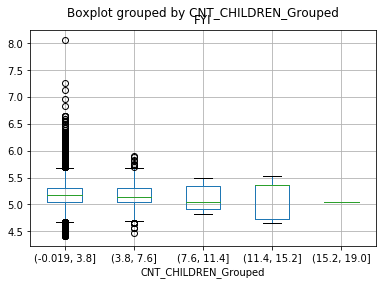

AMT_INCOME_TOTAL_Grouped
(-91324.35, 23420520.0]      5.167760
(23420520.0, 46815390.0]          NaN
(46815390.0, 70210260.0]          NaN
(70210260.0, 93605130.0]          NaN
(93605130.0, 117000000.0]    8.068186
Name: FYI, dtype: float64


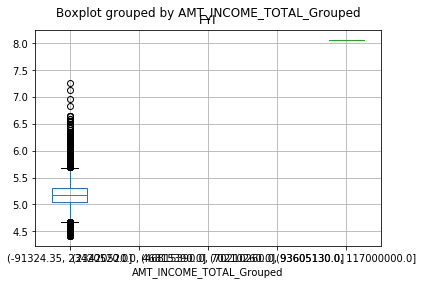

AMT_CREDIT_Grouped
(40995.0, 846000.0]       5.130334
(846000.0, 1647000.0]     5.255273
(1647000.0, 2448000.0]    5.431364
(2448000.0, 3249000.0]    5.498311
(3249000.0, 4050000.0]    5.780957
Name: FYI, dtype: float64


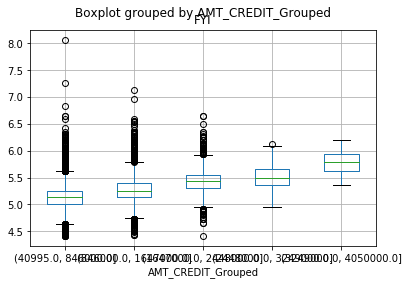

AMT_ANNUITY_Grouped
(1359.09, 52897.5]      5.130334
(52897.5, 104179.5]     5.393575
(104179.5, 155461.5]    5.582631
(155461.5, 206743.5]    5.732394
(206743.5, 258025.5]    5.883661
Name: FYI, dtype: float64


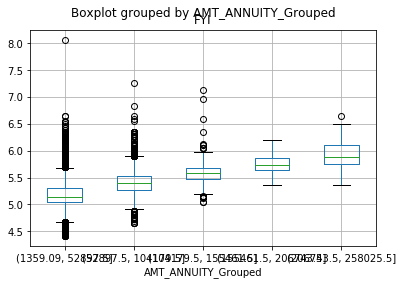

AMT_GOODS_PRICE_Grouped
(36490.5, 842400.0]       5.130334
(842400.0, 1644300.0]     5.306425
(1644300.0, 2446200.0]    5.431364
(2446200.0, 3248100.0]    5.498311
(3248100.0, 4050000.0]    5.719534
Name: FYI, dtype: float64


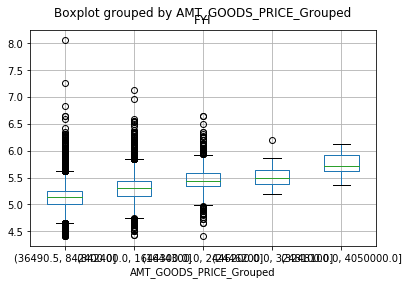

NAME_EDUCATION_TYPE_Grouped
Academic degree                  5.325212
Higher education                 5.255273
Incomplete higher                5.197281
Lower secondary                  5.051153
Secondary / secondary special    5.130334
Name: FYI, dtype: float64


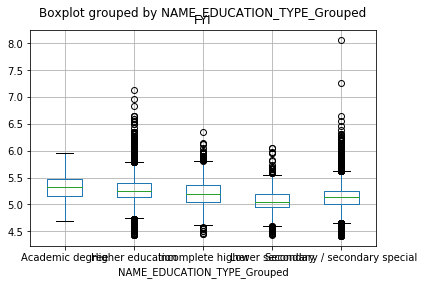

REGION_POPULATION_RELATIVE_Grouped
(0.000218, 0.0147]    5.158362
(0.0147, 0.0292]      5.130334
(0.0292, 0.0436]      5.158362
(0.0436, 0.0581]      5.343409
(0.0581, 0.0725]      5.393575
Name: FYI, dtype: float64


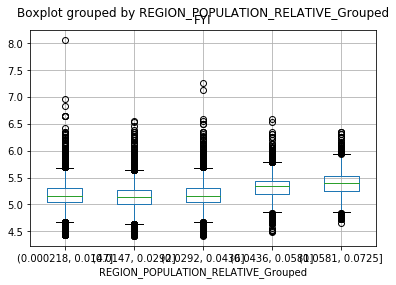

DAYS_BIRTH_Grouped
(7471.26, 11037.0]    5.130334
(11037.0, 14585.0]    5.197281
(14585.0, 18133.0]    5.197281
(18133.0, 21681.0]    5.144574
(21681.0, 25229.0]    5.100371
Name: FYI, dtype: float64


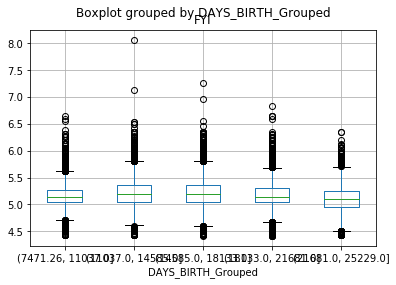

DAYS_EMPLOYED_Grouped
(-17929.912, -14329.6]    5.209515
(-14329.6, -10747.2]      5.197281
(-10747.2, -7164.8]       5.197281
(-7164.8, -3582.4]        5.197281
(-3582.4, 0.0]            5.197281
Name: FYI, dtype: float64


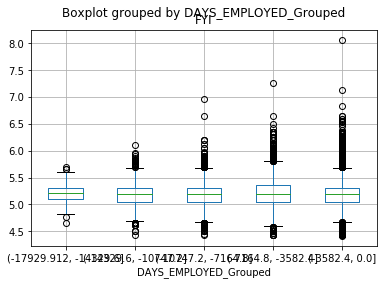

DAYS_REGISTRATION_Grouped
(-24696.672, -19737.6]    5.068186
(-19737.6, -14803.2]      5.130334
(-14803.2, -9868.8]       5.130334
(-9868.8, -4934.4]        5.158362
(-4934.4, 0.0]            5.197281
Name: FYI, dtype: float64


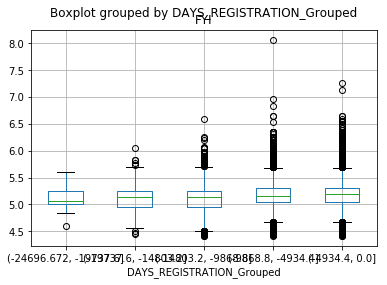

DAYS_ID_PUBLISH_Grouped
(-7204.197, -5757.6]    5.197281
(-5757.6, -4318.2]      5.144574
(-4318.2, -2878.8]      5.158362
(-2878.8, -1439.4]      5.197281
(-1439.4, 0.0]          5.197281
Name: FYI, dtype: float64


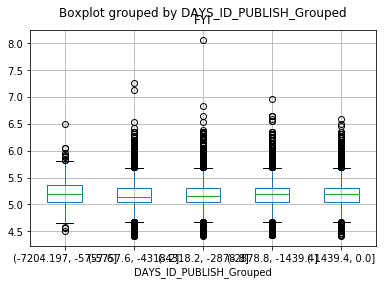

OWN_CAR_AGE_Grouped
(-0.091, 18.2]    5.255273
(18.2, 36.4]      5.184691
(36.4, 54.6]      5.130334
(54.6, 72.8]      5.197281
(72.8, 91.0]      5.153213
Name: FYI, dtype: float64


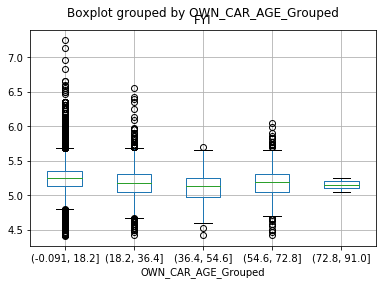

FLAG_MOBIL_Grouped
0    5.100371
1    5.167760
Name: FYI, dtype: float64


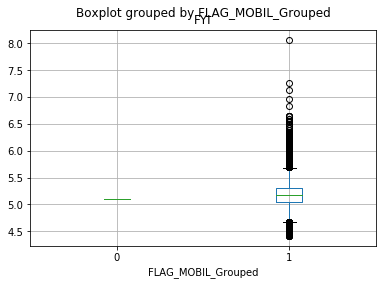

FLAG_EMP_PHONE_Grouped
0    5.068186
1    5.197281
Name: FYI, dtype: float64


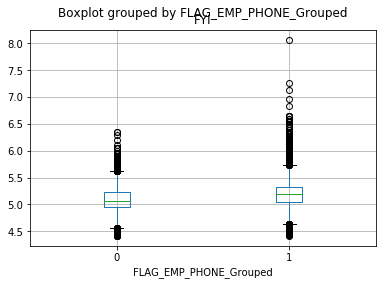

FLAG_WORK_PHONE_Grouped
0    5.197281
1    5.130334
Name: FYI, dtype: float64


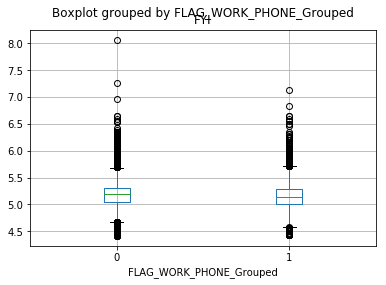

FLAG_CONT_MOBILE_Grouped
0    5.197281
1    5.165096
Name: FYI, dtype: float64


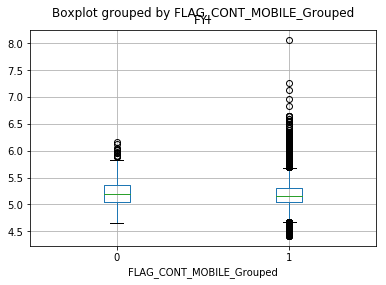

FLAG_PHONE_Grouped
0    5.171726
1    5.158362
Name: FYI, dtype: float64


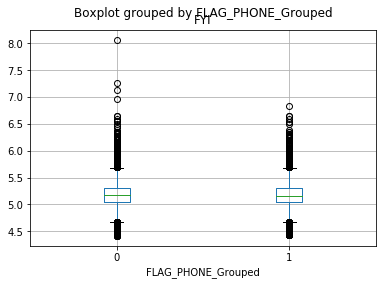

FLAG_EMAIL_Grouped
0    5.158362
1    5.255273
Name: FYI, dtype: float64


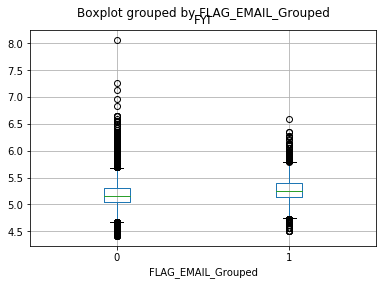

CNT_FAM_MEMBERS_Grouped
(0.981, 4.8]    5.166703
(4.8, 8.6]      5.171726
(8.6, 12.4]     5.059669
(12.4, 16.2]    5.352183
(16.2, 20.0]    5.051153
Name: FYI, dtype: float64


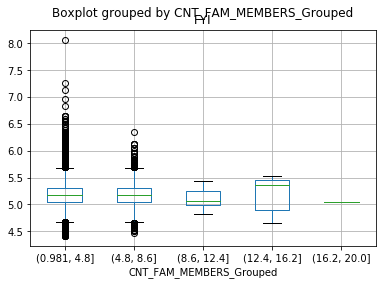

REGION_RATING_CLIENT_Grouped
1    5.352183
2    5.130334
3    5.130334
Name: FYI, dtype: float64


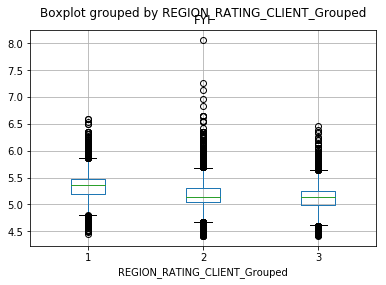

REGION_RATING_CLIENT_W_CITY_Grouped
1    5.352183
2    5.130334
3    5.130334
Name: FYI, dtype: float64


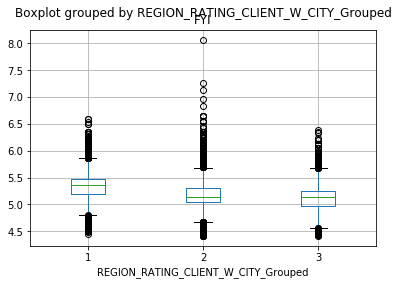

HOUR_APPR_PROCESS_START_Grouped
(-0.023, 4.6]    5.211921
(4.6, 9.2]       5.130334
(9.2, 13.8]      5.144574
(13.8, 18.4]     5.197281
(18.4, 23.0]     5.255273
Name: FYI, dtype: float64


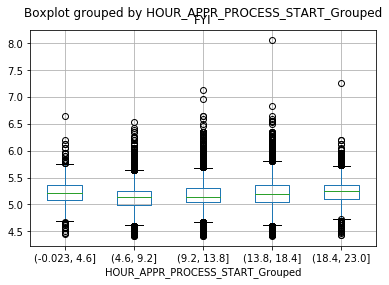

REG_REGION_NOT_LIVE_REGION_Grouped
0    5.158362
1    5.306425
Name: FYI, dtype: float64


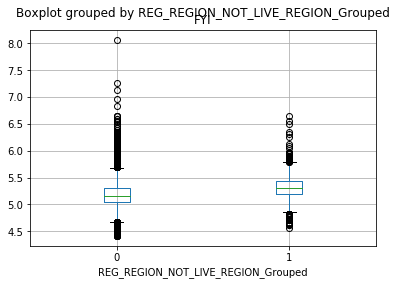

REG_REGION_NOT_WORK_REGION_Grouped
0    5.130334
1    5.306425
Name: FYI, dtype: float64


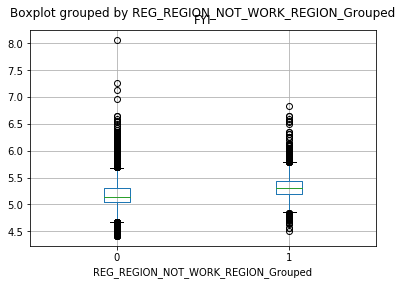

LIVE_REGION_NOT_WORK_REGION_Grouped
0    5.144574
1    5.315970
Name: FYI, dtype: float64


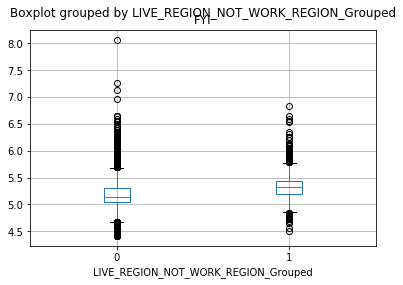

REG_CITY_NOT_LIVE_CITY_Grouped
0    5.158362
1    5.197281
Name: FYI, dtype: float64


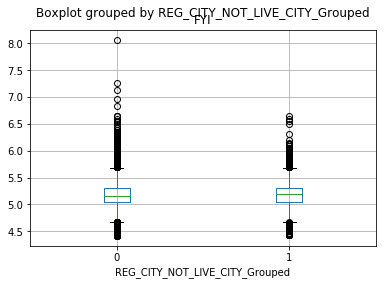

REG_CITY_NOT_WORK_CITY_Grouped
0    5.158362
1    5.197281
Name: FYI, dtype: float64


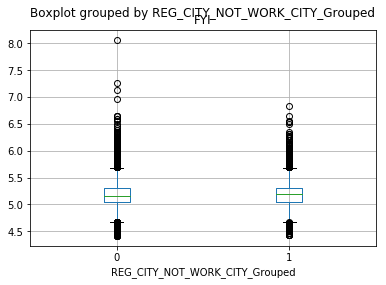

LIVE_CITY_NOT_WORK_CITY_Grouped
0    5.158362
1    5.197281
Name: FYI, dtype: float64


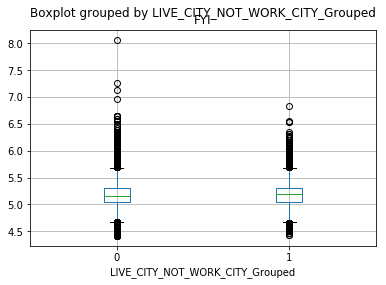

EXT_SOURCE_1_Grouped
(0.0136, 0.204]    5.135390
(0.204, 0.394]     5.197281
(0.394, 0.583]     5.197281
(0.583, 0.773]     5.197281
(0.773, 0.963]     5.209515
Name: FYI, dtype: float64


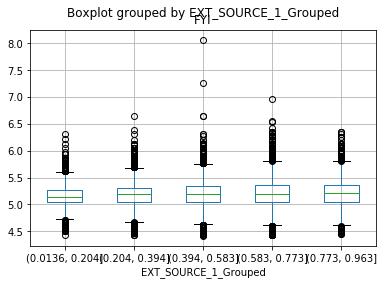

EXT_SOURCE_2_Grouped
(-0.000855, 0.171]    5.130334
(0.171, 0.342]        5.130334
(0.342, 0.513]        5.130334
(0.513, 0.684]        5.197281
(0.684, 0.855]        5.244277
Name: FYI, dtype: float64


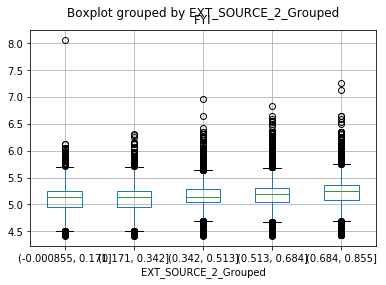

EXT_SOURCE_3_Grouped
(-0.000368, 0.18]    5.197281
(0.18, 0.359]        5.197281
(0.359, 0.538]       5.197281
(0.538, 0.717]       5.171726
(0.717, 0.896]       5.130334
Name: FYI, dtype: float64


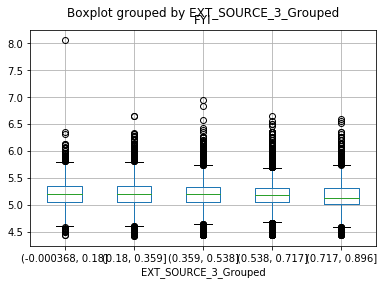

APARTMENTS_AVG_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.255273
(0.6, 0.8]       5.301545
(0.8, 1.0]       5.306425
Name: FYI, dtype: float64


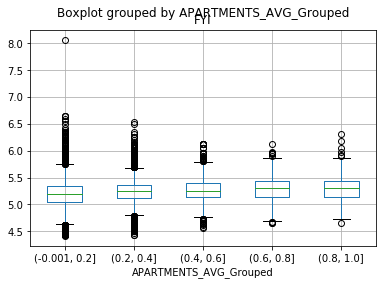

BASEMENTAREA_AVG_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.244277
(0.4, 0.6]       5.221414
(0.6, 0.8]       5.197281
(0.8, 1.0]       5.255273
Name: FYI, dtype: float64


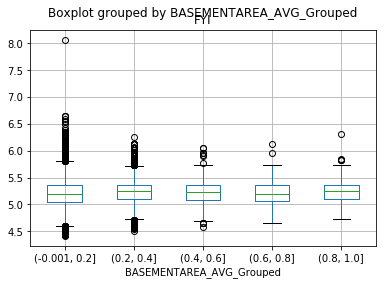

YEARS_BEGINEXPLUATATION_AVG_Grouped
(-0.001, 0.2]    5.144574
(0.2, 0.4]       5.197281
(0.4, 0.6]       5.197281
(0.6, 0.8]       5.197281
(0.8, 1.0]       5.197281
Name: FYI, dtype: float64


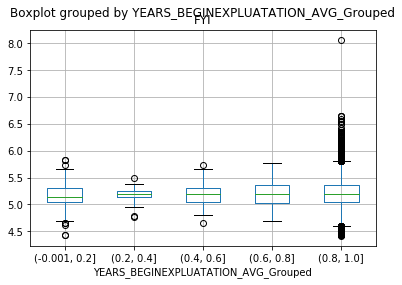

YEARS_BUILD_AVG_Grouped
(-0.001, 0.2]    5.255273
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.197281
(0.6, 0.8]       5.197281
(0.8, 1.0]       5.197281
Name: FYI, dtype: float64


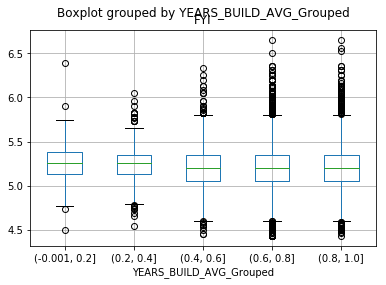

COMMONAREA_AVG_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.306425
(0.6, 0.8]       5.306425
(0.8, 1.0]       5.306425
Name: FYI, dtype: float64


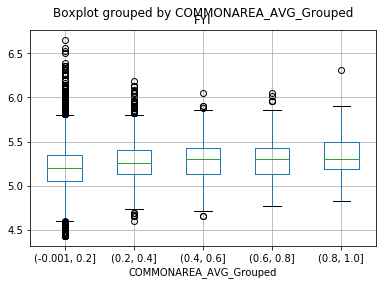

ELEVATORS_AVG_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.274905
(0.6, 0.8]       5.306425
(0.8, 1.0]       5.352183
Name: FYI, dtype: float64


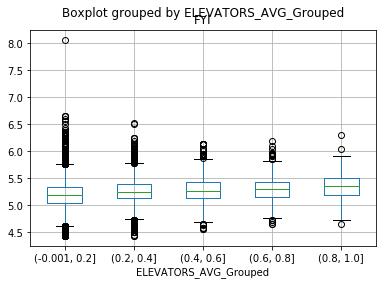

ENTRANCES_AVG_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.197281
(0.4, 0.6]       5.197281
(0.6, 0.8]       5.197281
(0.8, 1.0]       5.130334
Name: FYI, dtype: float64


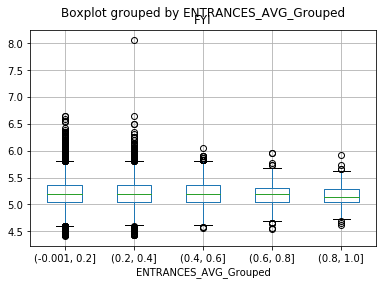

FLOORSMAX_AVG_Grouped
(-0.001, 0.2]    5.194792
(0.2, 0.4]       5.197281
(0.4, 0.6]       5.306425
(0.6, 0.8]       5.352183
(0.8, 1.0]       5.393575
Name: FYI, dtype: float64


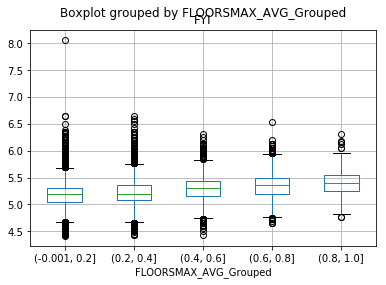

FLOORSMIN_AVG_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.197281
(0.4, 0.6]       5.255273
(0.6, 0.8]       5.352183
(0.8, 1.0]       5.352183
Name: FYI, dtype: float64


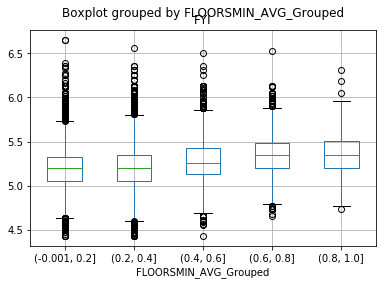

LANDAREA_AVG_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.197281
(0.4, 0.6]       5.197281
(0.6, 0.8]       5.197281
(0.8, 1.0]       5.197281
Name: FYI, dtype: float64


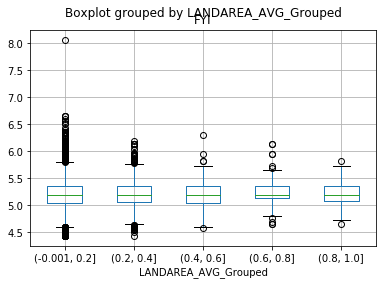

LIVINGAPARTMENTS_AVG_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.255273
(0.6, 0.8]       5.325310
(0.8, 1.0]       5.255273
Name: FYI, dtype: float64


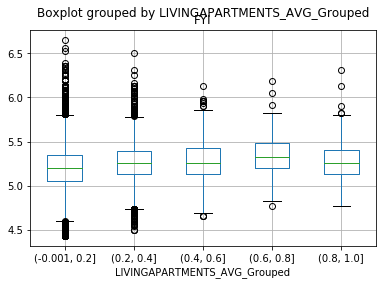

LIVINGAREA_AVG_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.255273
(0.6, 0.8]       5.286681
(0.8, 1.0]       5.306425
Name: FYI, dtype: float64


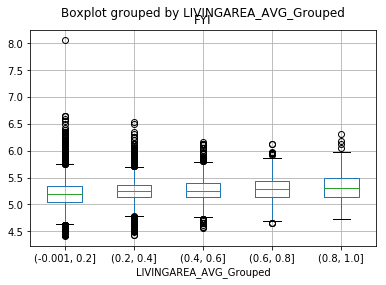

NONLIVINGAPARTMENTS_AVG_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.197281
(0.4, 0.6]       5.255273
(0.6, 0.8]       5.130334
(0.8, 1.0]       5.197281
Name: FYI, dtype: float64


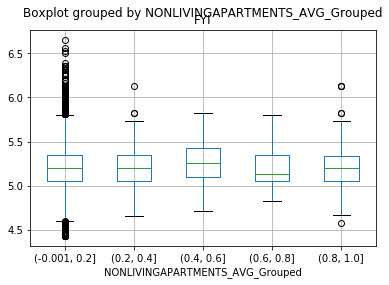

NONLIVINGAREA_AVG_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.276462
(0.6, 0.8]       5.306425
(0.8, 1.0]       5.255273
Name: FYI, dtype: float64


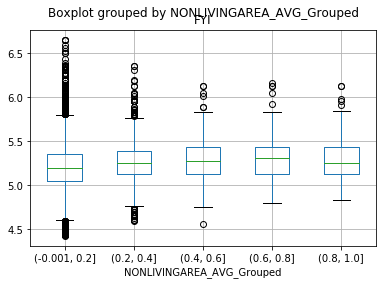

APARTMENTS_MODE_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.255273
(0.6, 0.8]       5.255273
(0.8, 1.0]       5.282112
Name: FYI, dtype: float64


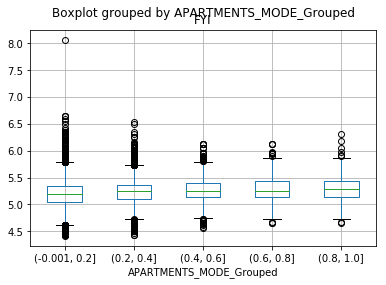

BASEMENTAREA_MODE_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.232996
(0.4, 0.6]       5.197281
(0.6, 0.8]       5.221414
(0.8, 1.0]       5.244134
Name: FYI, dtype: float64


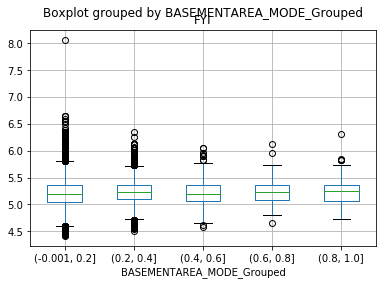

YEARS_BEGINEXPLUATATION_MODE_Grouped
(-0.001, 0.2]    5.165044
(0.2, 0.4]            NaN
(0.4, 0.6]       5.197281
(0.6, 0.8]       5.416641
(0.8, 1.0]       5.197281
Name: FYI, dtype: float64


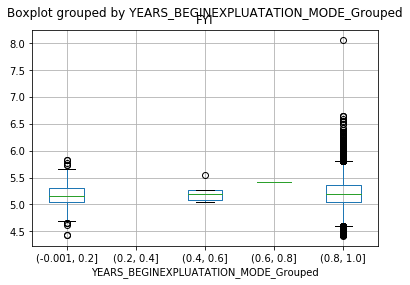

YEARS_BUILD_MODE_Grouped
(-0.001, 0.2]    5.255273
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.197281
(0.6, 0.8]       5.197281
(0.8, 1.0]       5.197281
Name: FYI, dtype: float64


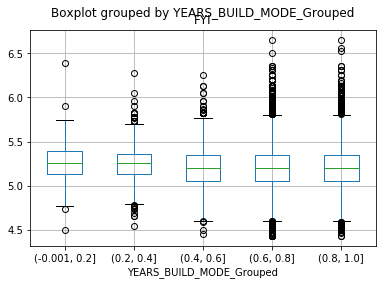

COMMONAREA_MODE_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.306425
(0.6, 0.8]       5.306425
(0.8, 1.0]       5.306425
Name: FYI, dtype: float64


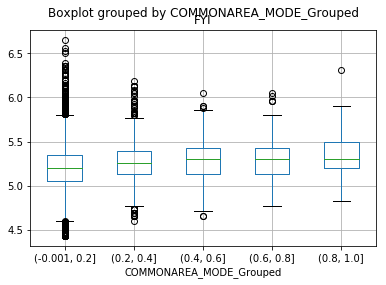

ELEVATORS_MODE_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.255273
(0.6, 0.8]       5.255273
(0.8, 1.0]       5.352183
Name: FYI, dtype: float64


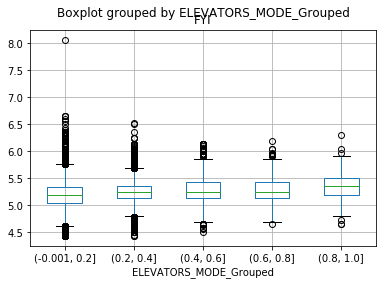

ENTRANCES_MODE_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.197281
(0.4, 0.6]       5.197281
(0.6, 0.8]       5.197281
(0.8, 1.0]       5.130334
Name: FYI, dtype: float64


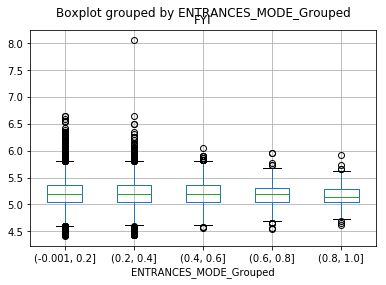

FLOORSMAX_MODE_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.197281
(0.4, 0.6]       5.306425
(0.6, 0.8]       5.352183
(0.8, 1.0]       5.393575
Name: FYI, dtype: float64


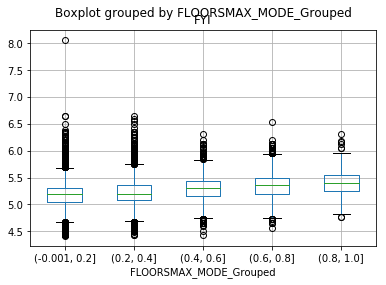

FLOORSMIN_MODE_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.197281
(0.4, 0.6]       5.255273
(0.6, 0.8]       5.352183
(0.8, 1.0]       5.352183
Name: FYI, dtype: float64


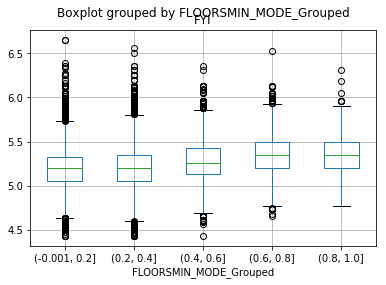

LANDAREA_MODE_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.197281
(0.4, 0.6]       5.197281
(0.6, 0.8]       5.197281
(0.8, 1.0]       5.197281
Name: FYI, dtype: float64


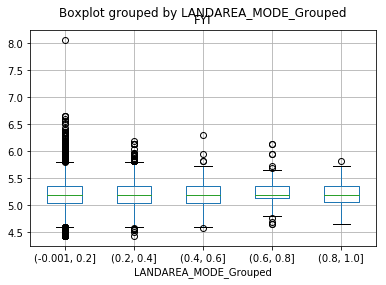

LIVINGAPARTMENTS_MODE_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.255273
(0.6, 0.8]       5.315970
(0.8, 1.0]       5.306425
Name: FYI, dtype: float64


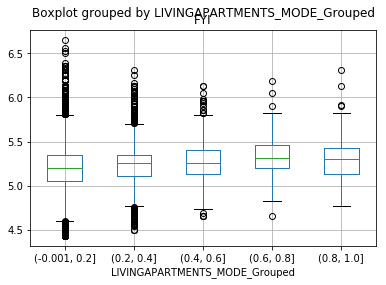

LIVINGAREA_MODE_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.255273
(0.6, 0.8]       5.276462
(0.8, 1.0]       5.306425
Name: FYI, dtype: float64


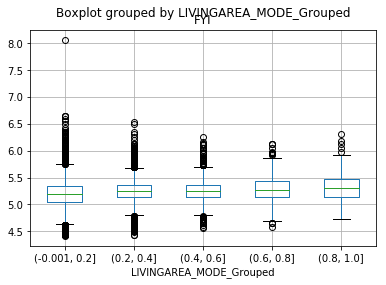

NONLIVINGAPARTMENTS_MODE_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.197281
(0.4, 0.6]       5.221256
(0.6, 0.8]       5.130334
(0.8, 1.0]       5.197281
Name: FYI, dtype: float64


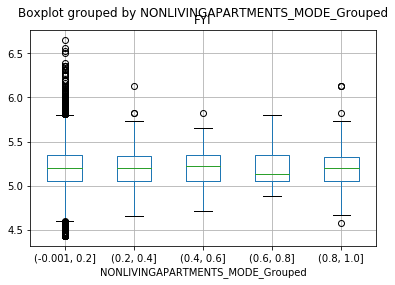

NONLIVINGAREA_MODE_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.276462
(0.6, 0.8]       5.306425
(0.8, 1.0]       5.255273
Name: FYI, dtype: float64


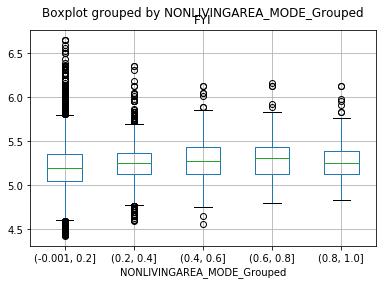

APARTMENTS_MEDI_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.255273
(0.6, 0.8]       5.306425
(0.8, 1.0]       5.286681
Name: FYI, dtype: float64


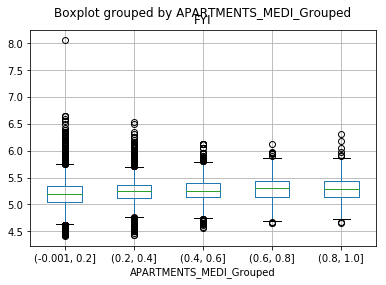

BASEMENTAREA_MEDI_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.232996
(0.4, 0.6]       5.221414
(0.6, 0.8]       5.197281
(0.8, 1.0]       5.255273
Name: FYI, dtype: float64


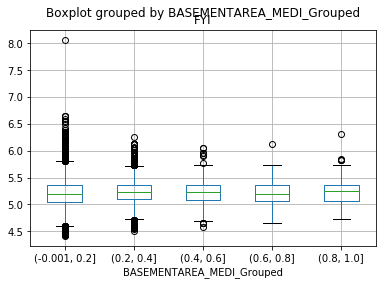

YEARS_BEGINEXPLUATATION_MEDI_Grouped
(-0.001, 0.2]    5.158362
(0.2, 0.4]            NaN
(0.4, 0.6]       5.197281
(0.6, 0.8]       5.556303
(0.8, 1.0]       5.197281
Name: FYI, dtype: float64


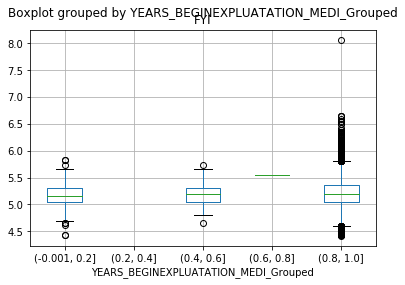

YEARS_BUILD_MEDI_Grouped
(-0.001, 0.2]    5.255273
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.197281
(0.6, 0.8]       5.197281
(0.8, 1.0]       5.197281
Name: FYI, dtype: float64


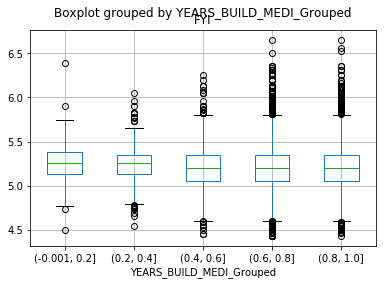

COMMONAREA_MEDI_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.306425
(0.6, 0.8]       5.306425
(0.8, 1.0]       5.306425
Name: FYI, dtype: float64


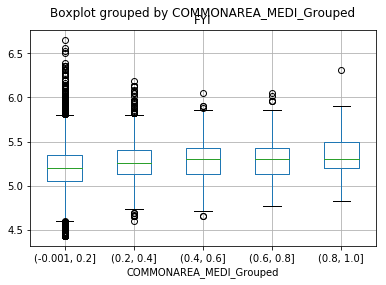

ELEVATORS_MEDI_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.272306
(0.6, 0.8]       5.306425
(0.8, 1.0]       5.352183
Name: FYI, dtype: float64


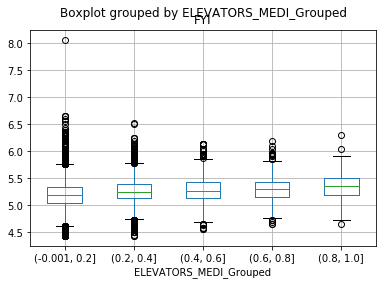

ENTRANCES_MEDI_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.197281
(0.4, 0.6]       5.197281
(0.6, 0.8]       5.197281
(0.8, 1.0]       5.130334
Name: FYI, dtype: float64


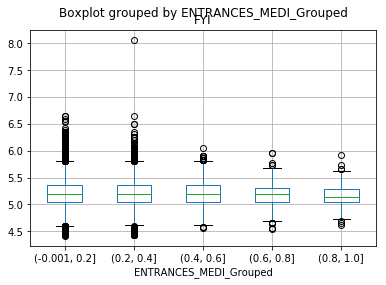

FLOORSMAX_MEDI_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.197281
(0.4, 0.6]       5.306425
(0.6, 0.8]       5.352183
(0.8, 1.0]       5.393575
Name: FYI, dtype: float64


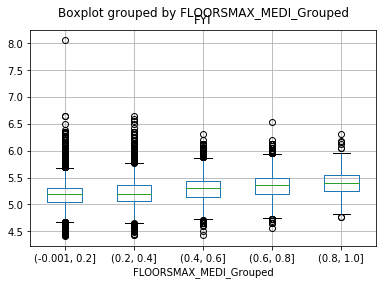

FLOORSMIN_MEDI_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.197281
(0.4, 0.6]       5.255273
(0.6, 0.8]       5.352183
(0.8, 1.0]       5.352183
Name: FYI, dtype: float64


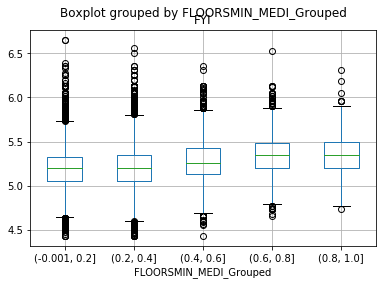

LANDAREA_MEDI_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.197281
(0.4, 0.6]       5.197281
(0.6, 0.8]       5.197281
(0.8, 1.0]       5.197281
Name: FYI, dtype: float64


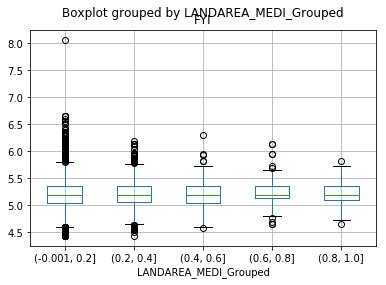

LIVINGAPARTMENTS_MEDI_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.255273
(0.6, 0.8]       5.350000
(0.8, 1.0]       5.306425
Name: FYI, dtype: float64


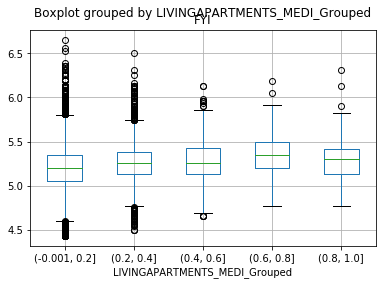

LIVINGAREA_MEDI_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.255273
(0.6, 0.8]       5.265996
(0.8, 1.0]       5.306425
Name: FYI, dtype: float64


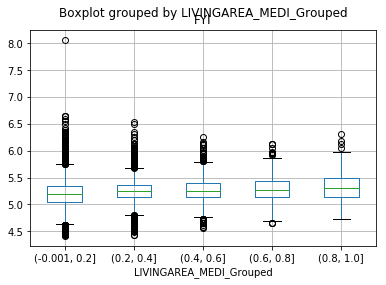

NONLIVINGAPARTMENTS_MEDI_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.221414
(0.4, 0.6]       5.255273
(0.6, 0.8]       5.130334
(0.8, 1.0]       5.197281
Name: FYI, dtype: float64


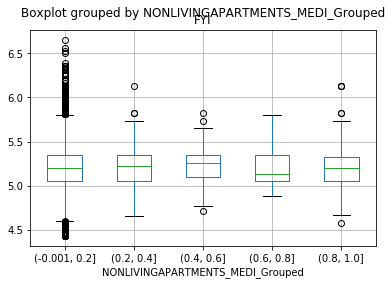

NONLIVINGAREA_MEDI_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.265996
(0.6, 0.8]       5.306425
(0.8, 1.0]       5.255273
Name: FYI, dtype: float64


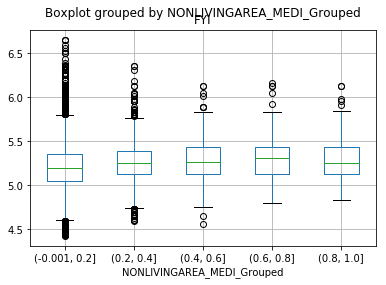

FONDKAPREMONT_MODE_Grouped
not specified            5.197281
org spec account         5.209515
reg oper account         5.197281
reg oper spec account    5.197281
Name: FYI, dtype: float64


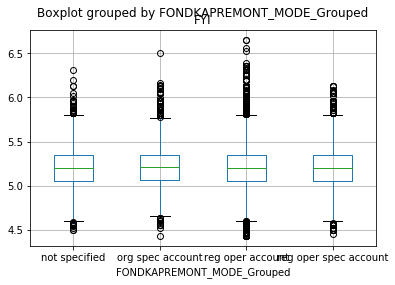

HOUSETYPE_MODE_Grouped
block of flats      5.197281
specific housing    5.158362
terraced house      5.197281
Name: FYI, dtype: float64


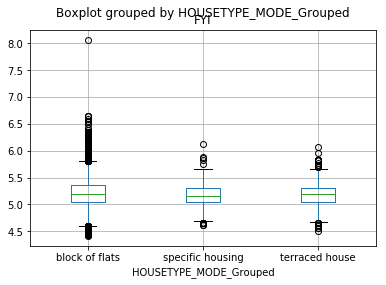

TOTALAREA_MODE_Grouped
(-0.001, 0.2]    5.197281
(0.2, 0.4]       5.255273
(0.4, 0.6]       5.255273
(0.6, 0.8]       5.286681
(0.8, 1.0]       5.306425
Name: FYI, dtype: float64


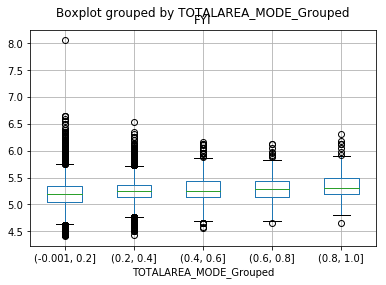

EMERGENCYSTATE_MODE_Grouped
No     5.197281
Yes    5.130334
Name: FYI, dtype: float64


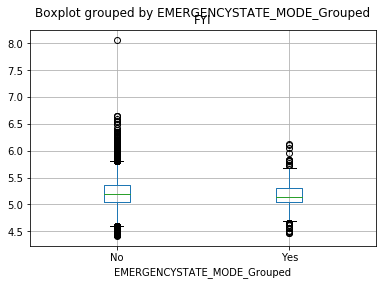

OBS_30_CNT_SOCIAL_CIRCLE_Grouped
(-0.348, 69.6]    5.162415
(69.6, 139.2]          NaN
(139.2, 208.8]         NaN
(208.8, 278.4]         NaN
(278.4, 348.0]    5.306425
Name: FYI, dtype: float64


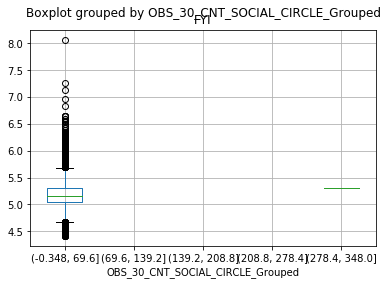

DEF_30_CNT_SOCIAL_CIRCLE_Grouped
(-0.034, 6.8]    5.162415
(6.8, 13.6]      5.042288
(13.6, 20.4]          NaN
(20.4, 27.2]          NaN
(27.2, 34.0]     5.306425
Name: FYI, dtype: float64


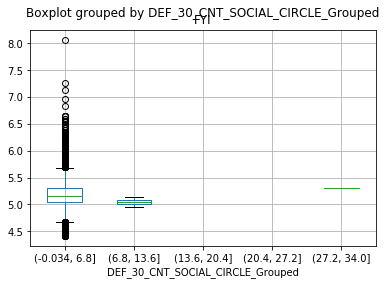

OBS_60_CNT_SOCIAL_CIRCLE_Grouped
(-0.344, 68.8]    5.162415
(68.8, 137.6]          NaN
(137.6, 206.4]         NaN
(206.4, 275.2]         NaN
(275.2, 344.0]    5.306425
Name: FYI, dtype: float64


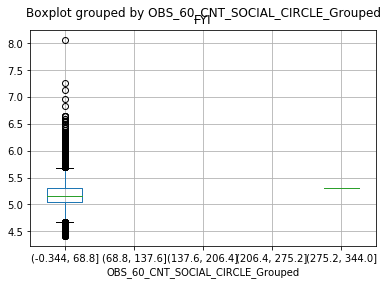

DEF_60_CNT_SOCIAL_CIRCLE_Grouped
(-0.024, 4.8]    5.162415
(4.8, 9.6]       5.130334
(9.6, 14.4]           NaN
(14.4, 19.2]          NaN
(19.2, 24.0]     5.306425
Name: FYI, dtype: float64


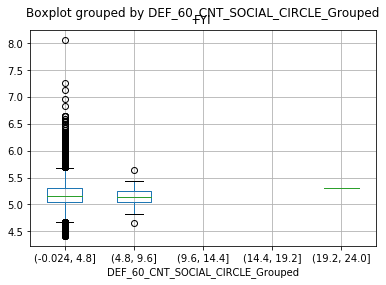

DAYS_LAST_PHONE_CHANGE_Grouped
(-4296.292, -3433.6]    5.306425
(-3433.6, -2575.2]      5.197281
(-2575.2, -1716.8]      5.197281
(-1716.8, -858.4]       5.197281
(-858.4, 0.0]           5.130334
Name: FYI, dtype: float64


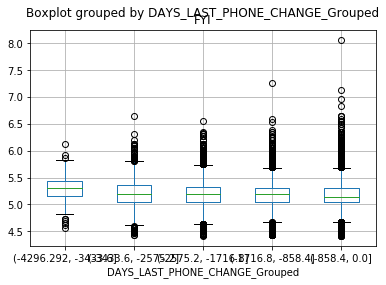

FLAG_DOCUMENT_2_Grouped
0    5.167760
1    5.051153
Name: FYI, dtype: float64


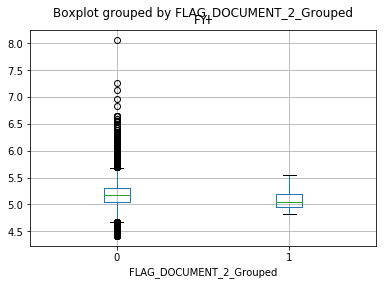

FLAG_DOCUMENT_3_Grouped
0    5.171726
1    5.158362
Name: FYI, dtype: float64


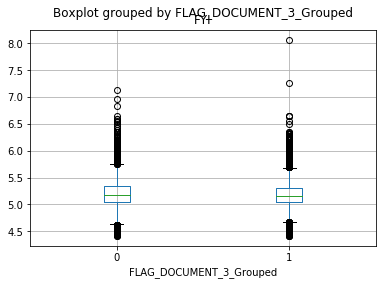

FLAG_DOCUMENT_4_Grouped
0    5.167760
1    5.171726
Name: FYI, dtype: float64


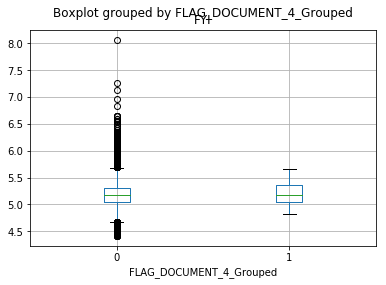

FLAG_DOCUMENT_5_Grouped
0    5.166430
1    5.171726
Name: FYI, dtype: float64


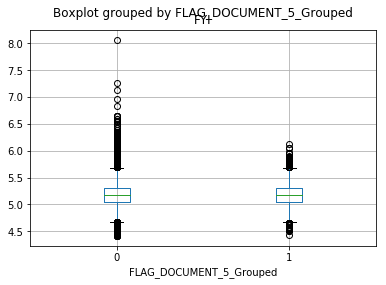

FLAG_DOCUMENT_6_Grouped
0    5.197281
1    5.051153
Name: FYI, dtype: float64


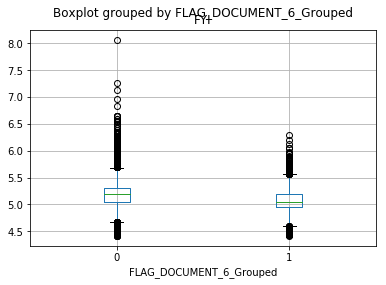

FLAG_DOCUMENT_7_Grouped
0    5.167760
1    5.184691
Name: FYI, dtype: float64


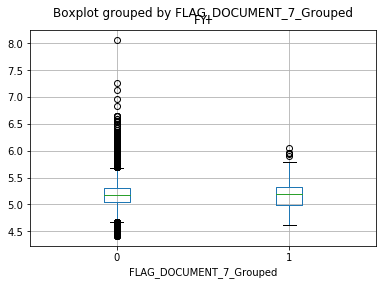

FLAG_DOCUMENT_8_Grouped
0    5.130334
1    5.306425
Name: FYI, dtype: float64


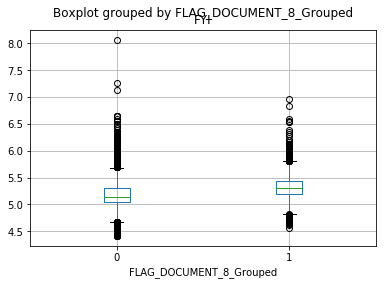

FLAG_DOCUMENT_9_Grouped
0    5.158362
1    5.306425
Name: FYI, dtype: float64


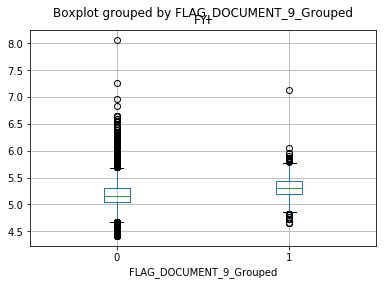

FLAG_DOCUMENT_10_Grouped
0    5.167760
1    5.255273
Name: FYI, dtype: float64


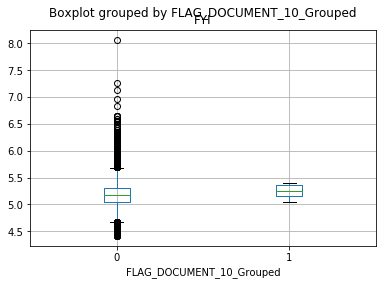

FLAG_DOCUMENT_11_Grouped
0    5.165096
1    5.174351
Name: FYI, dtype: float64


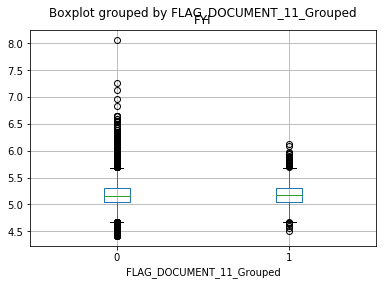

FLAG_DOCUMENT_12_Grouped
0    5.167760
1    5.559669
Name: FYI, dtype: float64


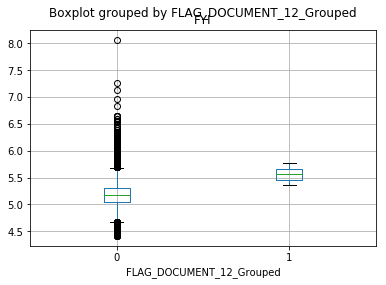

FLAG_DOCUMENT_13_Grouped
0    5.158362
1    5.352183
Name: FYI, dtype: float64


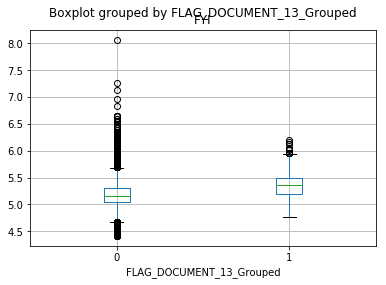

FLAG_DOCUMENT_14_Grouped
0    5.158362
1    5.325310
Name: FYI, dtype: float64


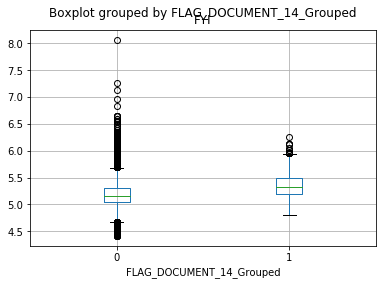

FLAG_DOCUMENT_15_Grouped
0    5.161068
1    5.306425
Name: FYI, dtype: float64


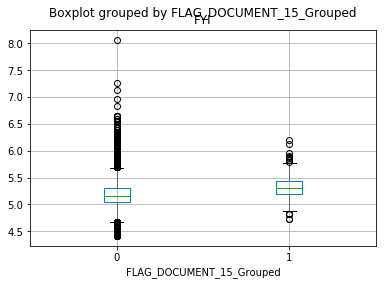

FLAG_DOCUMENT_16_Grouped
0    5.158362
1    5.197281
Name: FYI, dtype: float64


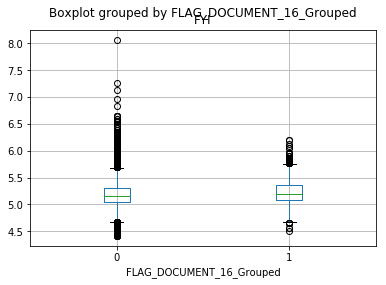

FLAG_DOCUMENT_17_Grouped
0    5.166430
1    5.215465
Name: FYI, dtype: float64


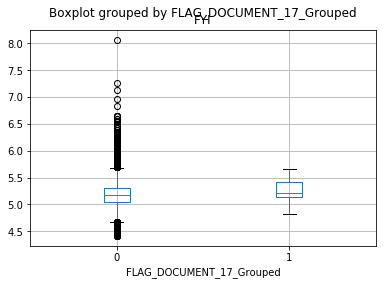

FLAG_DOCUMENT_18_Grouped
0    5.166430
1    5.171726
Name: FYI, dtype: float64


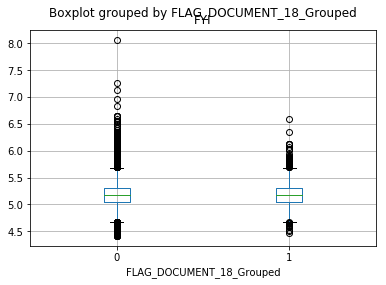

FLAG_DOCUMENT_19_Grouped
0    5.165096
1    5.255273
Name: FYI, dtype: float64


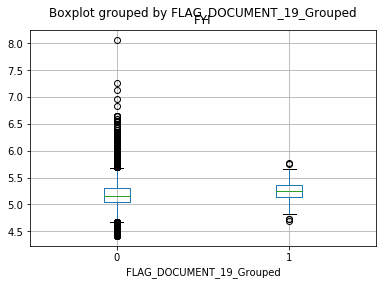

FLAG_DOCUMENT_20_Grouped
0    5.166430
1    5.197281
Name: FYI, dtype: float64


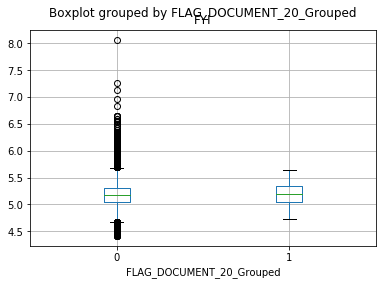

FLAG_DOCUMENT_21_Grouped
0    5.167760
1    5.158362
Name: FYI, dtype: float64


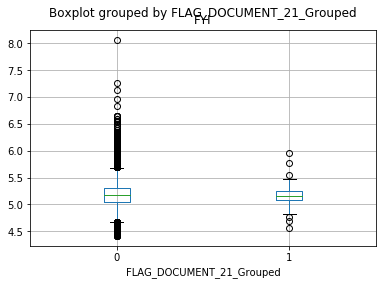

AMT_REQ_CREDIT_BUREAU_HOUR_Grouped
(-0.004, 0.8]    5.197281
(0.8, 1.6]       5.197281
(1.6, 2.4]       5.197281
(2.4, 3.2]       5.286681
(3.2, 4.0]       5.393575
Name: FYI, dtype: float64


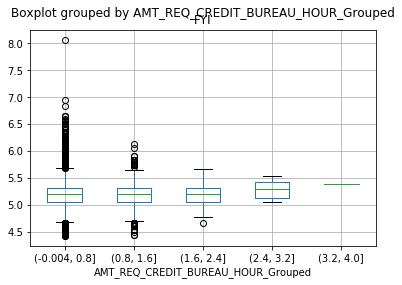

AMT_REQ_CREDIT_BUREAU_DAY_Grouped
(-0.009, 1.8]    5.197281
(1.8, 3.6]       5.197281
(3.6, 5.4]       5.255273
(5.4, 7.2]       5.251853
(7.2, 9.0]       5.416641
Name: FYI, dtype: float64


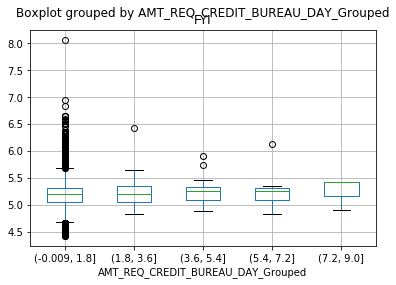

AMT_REQ_CREDIT_BUREAU_WEEK_Grouped
(-0.008, 1.6]    5.197281
(1.6, 3.2]       5.197281
(3.2, 4.8]       5.197281
(4.8, 6.4]       5.255273
(6.4, 8.0]       5.306425
Name: FYI, dtype: float64


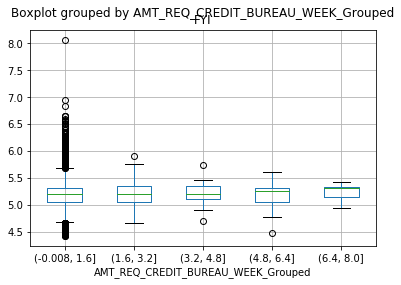

AMT_REQ_CREDIT_BUREAU_MON_Grouped
(-0.027, 5.4]    5.197281
(5.4, 10.8]      5.255273
(10.8, 16.2]     5.306425
(16.2, 21.6]     5.255273
(21.6, 27.0]     5.379872
Name: FYI, dtype: float64


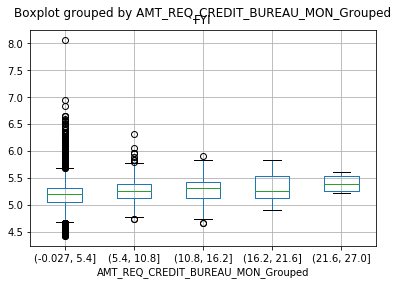

AMT_REQ_CREDIT_BUREAU_QRT_Grouped
(-0.261, 52.2]    5.197281
(52.2, 104.4]          NaN
(104.4, 156.6]         NaN
(156.6, 208.8]         NaN
(208.8, 261.0]    5.556303
Name: FYI, dtype: float64


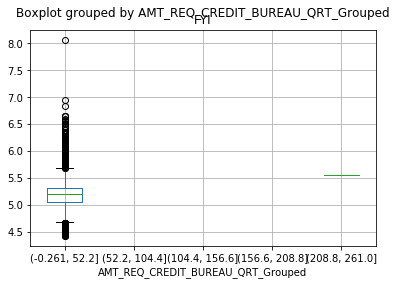

AMT_REQ_CREDIT_BUREAU_YEAR_Grouped
(-0.025, 5.0]    5.197281
(5.0, 10.0]      5.197281
(10.0, 15.0]     5.197281
(15.0, 20.0]     5.197281
(20.0, 25.0]     5.368894
Name: FYI, dtype: float64


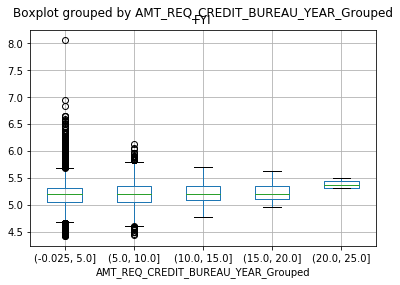

DAYS_EMPLOYED_ANOM_Grouped
False    5.197281
True     5.068186
Name: FYI, dtype: float64


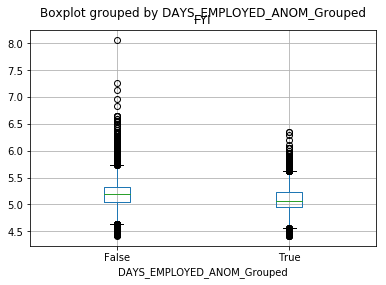

FYI_Grouped
(4.405, 5.141]    5.051153
(5.141, 5.873]    5.306425
(5.873, 6.605]    5.954243
(6.605, 7.336]    6.741258
(7.336, 8.068]    8.068186
Name: FYI, dtype: float64


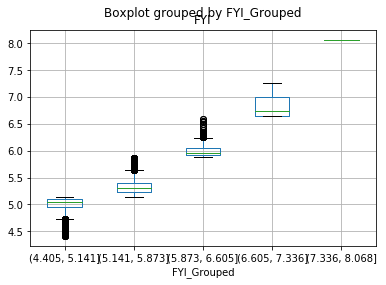

In [5]:
app_train['FYI'] = np.log10(app_train['AMT_INCOME_TOTAL'])
for col in app_train:
    try:
        if len(list(app_train[col].unique()))>5:
            app_train[f'{col}_Grouped']=pd.cut(app_train[col],5)
        else:
            app_train[f'{col}_Grouped']=app_train[col]
        print(app_train.groupby(f'{col}_Grouped')['FYI'].median())
        app_train.boxplot(by=f'{col}_Grouped',column='FYI')
        plt.show()            
    except:
        pass